<a href="https://colab.research.google.com/github/omartinez182/VMLS/blob/main/Python_Companion/VMLS_Python%2C_Ch_02_Linear_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 2.1 Linear Functions

#### Functions in Python

In [ ]:
f = lambda x: x[0] + x[1] - ( x[3])**2
g = lambda x,a: sum([x[n]*a[n] for n in range(len(x)) if range(len(x)) == range(len(a))])

In [ ]:
x = [-1,0,1,2]
a = [1,2,3,4]
f(x), g(x,a)

(-5, 10)

#### Superposition

1. Homogeneity property: f(ax) = a(fx)
2. Additivity property: f(x+y) = f(x) + f(y)
3. Superposition: f(ax+by) = a(fx)+b(fy)

In [ ]:
a = np.array([-2,0,1,-3])
f = lambda x: np.inner(a,x)
x,y = np.array([2,2,-1,1]), np.array([0,1,-1,0])
alpha, beta = 1.5, -3.7

In [ ]:
lhs,rhs = f(alpha*x + beta*y), alpha*f(x) + beta*f(y)
lhs,rhs

(-8.3, -8.3)

In [ ]:
e3 = [0,0,1,0]
f(e3)

1

In [ ]:
avg = lambda x: np.inner((np.ones(len(x))/len(x)),x)
x = np.array([1,-3,2,-1])
avg(x)

-0.25

# 2.2 Taylor Approximations

In [ ]:
#This is an example of a non linear, non affine function, 
#being approximated by a function that is linear and affine

from math import exp
f = lambda x: x[0] + exp(x[1]-x[0]) #some function x+e**(2x-x)
grad_f = lambda x: [1-exp(x[1]-x[0]), exp(x[1]-x[0])] #function gradient
z = [1,2]
f_hat = lambda x: f(z) + np.inner(grad_f(z),(x-z))
f([1,2]), f_hat(np.array([1,2]))

(3.718281828459045, 3.718281828459045)

In [ ]:
# With another x but still close to z
f([0.96,1.98]), f_hat(np.array([0.96,1.98]))

(3.7331947639642977, 3.732647465028226)

In [ ]:
# With another x but further away from z 
print("Notice that as x gets further away from z the precision of the approximation gets worse, for example, using x = (0,4) we get:",
      f([0,4]), f_hat(np.array([0,4])))

Notice that as x gets further away from z the precision of the approximation gets worse, for example, using x = (0,4) we get: 54.598150033144236 10.87312731383618


# 2.3 Regression

In [ ]:
#beta is an n-vector, aka a weight, 
#v is a scalar, aka offset, intercept
#x, y aka regressor, predictor

#beta and v are parameters in this regression model
beta,v = np.array([148.73, -18.85]), 54.40
y_hat = lambda x: np.inner(x,beta) + v
y_hat(np.array([0.846, 1])), y_hat(np.array([1.324,2])) 
#actuals: 115, 234.50

(161.37557999999999, 213.61852000000002)

In [ ]:
D = dict(
{'baths': np.array([2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2,
       1, 3, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3, 4, 3, 1, 3, 3, 2, 2, 3,
       2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2,
       2, 1, 3, 1, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 4, 2, 1, 2, 1, 3, 4, 3,
       2, 3, 3, 2, 3, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 3, 2, 1, 2, 2, 2, 3, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2,
       1, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2,
       3, 3, 3, 2, 2, 4, 3, 2, 4, 3, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 3,
       2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 1, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       1, 1, 3, 4, 3, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2]), 'location': np.array([2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3,
       2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 4, 2, 2, 3, 3, 2,
       3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 4, 3, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 1, 3, 4, 3, 3, 3, 2, 4, 3, 3, 3, 4, 2, 2,
       1, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 2, 4, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 4, 2, 3,
       3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 4, 2, 4, 2, 2, 3, 2, 2, 3, 4, 4,
       3, 3, 2, 1, 4, 3, 4, 3, 1, 3, 3, 4, 4, 3, 3, 2, 1, 4, 2, 3, 2, 2,
       2, 3, 3, 2, 4, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 4, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2,
       2, 3, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 4,
       2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 4, 4, 2, 2, 3, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 1, 4, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       2, 2, 3, 2, 3, 2, 3, 3, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 4, 2, 2, 4, 2, 2, 3, 3, 3, 2, 3, 1, 2, 4, 2, 3, 3, 2, 3, 3,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 1, 4, 3, 1, 2, 1,
       2, 4, 1, 4, 3, 3, 2, 4, 2, 3, 4, 4, 2, 3, 4, 2, 4, 3, 3, 2, 2, 2,
       1, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 4, 3, 2, 4, 3, 3, 3,
       3, 2, 3, 2, 2, 4, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 3, 3, 4, 2, 1, 1, 2, 3, 2, 3, 3, 2, 2, 3, 3, 4, 2, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 4, 2, 2, 4, 2, 3,
       3, 2, 4, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 4, 3, 1, 2, 4, 3, 4, 3,
       2, 2, 4, 4, 3, 4, 2, 4, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 2, 4, 3,
       2, 4, 4, 3, 4, 4, 3, 3, 2, 4, 3, 4, 1, 2, 4, 1, 4, 3, 4, 2, 4, 2,
       2, 1, 4, 3, 4, 4, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 1,
       3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 2, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 1, 2, 3, 2, 4,
       2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 4, 3, 3, 3, 3,
       3, 2, 3, 4]), 'price': np.array([ 94.905,  98.937, 100.309, 106.25 , 107.502, 108.75 , 110.7  ,
       113.263, 116.25 , 120.   , 121.63 , 122.   , 122.682, 123.   ,
       124.1  , 125.   , 126.64 , 127.281, 129.   , 131.2  , 132.   ,
       133.   , 134.555, 136.5  , 138.75 , 141.   , 146.25 , 147.308,
       148.75 , 149.593, 150.   , 152.   , 154.   , 156.896, 161.25 ,
       161.5  , 164.   , 165.   , 166.357, 166.357, 168.   , 170.   ,
       173.   , 174.25 , 174.313, 178.48 , 178.76 , 181.   , 181.872,
       182.587, 182.716, 182.75 , 183.2  , 188.741, 189.   , 192.067,
       194.   , 194.818, 198.   , 199.5  , 200.   , 200.   , 208.   ,
       212.864, 221.   , 221.   , 223.058, 227.887, 231.477, 234.697,
       235.   , 236.   , 236.685, 237.8  , 240.122, 242.638, 244.   ,
       244.96 , 245.918, 250.   , 250.   , 250.134, 254.2  , 254.2  ,
       258.   , 260.   , 260.014, 265.   , 271.742, 273.75 , 275.086,
       280.987, 285.   , 287.417, 291.   , 292.024, 297.   , 298.   ,
       299.   , 304.037, 311.   , 315.537, 320.   , 328.36 , 334.15 ,
       335.75 , 335.75 , 344.25 , 346.21 , 347.029, 347.65 , 351.3  ,
       370.5  , 372.   , 375.   , 381.3  , 381.942, 387.731, 391.   ,
       394.47 , 395.   , 400.186, 415.   , 425.   , 430.   , 460.   ,
       461.   , 489.332, 510.   , 539.   , 660.   ,  69.   ,  70.   ,
        71.   ,  78.   ,  78.4  ,  80.   ,  89.   ,  90.   ,  90.   ,
        92.   ,  93.675,  98.   ,  98.   ,  99.   , 100.   , 106.716,
       111.   , 111.   , 114.8  , 120.108, 123.225, 123.75 , 125.   ,
       125.   , 126.   , 129.   , 134.   , 135.   , 135.5  , 140.   ,
       140.   , 142.5  , 143.5  , 145.   , 145.   , 145.   , 146.   ,
       148.5  , 149.   , 150.   , 150.   , 152.   , 156.   , 156.   ,
       156.   , 157.788, 161.653, 161.829, 165.   , 168.   , 169.   ,
       175.   , 176.25 , 179.   , 180.   , 180.4  , 182.   , 184.5  ,
       185.   , 189.   , 194.   , 195.   , 200.   , 205.   , 205.   ,
       205.   , 207.   , 215.   , 215.   , 222.381, 225.   , 225.   ,
       225.   , 228.   , 229.665, 230.   , 230.   , 230.   , 234.   ,
       235.   , 236.25 , 245.   , 245.   , 245.   , 250.   , 250.   ,
       250.   , 255.   , 257.729, 260.   , 261.   , 264.469, 265.   ,
       270.   , 270.   , 275.   , 275.   , 280.   , 286.013, 292.   ,
       292.   , 293.993, 294.   , 296.769, 300.   , 300.   , 300.5  ,
       305.   , 319.789, 330.   , 330.   , 331.   , 334.   , 336.   ,
       339.   , 339.   , 345.   , 356.   , 361.745, 361.948, 370.   ,
       385.   , 399.   , 402.   , 406.026, 420.   , 425.   , 445.   ,
       450.   , 460.   , 460.   , 465.   , 471.75 , 484.   , 495.   ,
       572.5  , 582.   , 613.401, 680.   , 699.   ,  61.5  ,  62.05 ,
        65.   ,  65.   ,  68.   ,  68.   ,  77.   ,  82.732,  84.   ,
        84.675,  85.   ,  90.   ,  90.   ,  91.   ,  95.   ,  97.5  ,
       100.   , 101.   , 102.75 , 112.5  , 113.   , 114.   , 114.   ,
       114.75 , 115.   , 115.   , 116.1  , 119.25 , 120.   , 120.   ,
       120.108, 121.5  , 121.725, 122.   , 123.   , 125.   , 125.573,
       126.714, 126.96 , 127.   , 127.5  , 130.   , 133.105, 136.5  ,
       139.5  , 140.   , 140.8  , 145.   , 147.   , 149.6  , 150.   ,
       150.   , 155.   , 155.435, 155.5  , 158.   , 158.   , 160.   ,
       160.   , 164.   , 164.   , 165.   , 167.   , 167.293, 167.293,
       168.   , 170.   , 170.   , 170.   , 174.   , 178.   , 180.   ,
       180.   , 180.   , 182.   , 188.325, 191.5  , 192.   , 192.7  ,
       195.   , 197.654, 198.   , 200.345, 203.   , 207.   , 208.   ,
       210.   , 212.   , 213.675, 213.697, 215.   , 215.   , 215.1  ,
       217.5  , 218.   , 220.   , 221.   , 222.9  , 223.139, 225.5  ,
       228.327, 230.   , 230.   , 230.522, 231.2  , 232.   , 232.5  ,
       233.641, 234.   , 234.5  , 235.   , 236.073, 238.   , 238.861,
       239.7  , 240.   , 240.   , 241.   , 245.   , 246.   , 247.234,
       247.48 , 249.862, 251.   , 252.155, 254.172, 258.   , 260.   ,
       261.   , 261.   , 262.5  , 266.   , 266.   , 270.   , 274.425,
       275.336, 277.98 , 280.   , 284.686, 284.893, 285.   , 285.   ,
       295.   , 296.   , 296.056, 297.359, 299.94 , 305.   , 311.328,
       313.138, 316.63 , 320.   , 320.   , 325.   , 328.578, 331.   ,
       340.   , 345.746, 351.   , 353.767, 356.035, 360.552, 362.305,
       365.   , 370.   , 378.   , 388.   , 395.1  , 400.   , 408.431,
       423.   , 427.5  , 430.922, 445.   , 450.   , 452.   , 470.   ,
       475.   , 484.5  , 500.   , 506.688, 528.   , 579.093, 636.   ,
       668.365, 676.2  , 691.659,  55.422,  63.   ,  65.   ,  65.   ,
        65.   ,  66.5  ,  71.   ,  75.   ,  77.   ,  85.   ,  95.625,
        96.14 , 104.25 , 105.   , 108.   , 109.   , 115.   , 115.   ,
       115.5  , 115.62 , 116.   , 122.   , 122.5  , 123.   , 124.   ,
       124.   , 124.413, 125.   , 130.   , 131.75 , 137.721, 137.76 ,
       138.   , 140.   , 145.   , 145.   , 150.   , 150.   , 151.   ,
       155.   , 155.8  , 156.142, 158.   , 160.   , 161.5  , 161.6  ,
       162.   , 165.   , 165.   , 167.293, 168.   , 168.   , 168.75 ,
       168.75 , 170.   , 170.25 , 173.   , 176.095, 176.25 , 178.   ,
       179.   , 180.   , 180.   , 180.   , 181.   , 182.   , 182.587,
       185.074, 185.833, 186.785, 187.   , 188.335, 190.   , 190.   ,
       190.   , 190.   , 191.25 , 193.   , 193.5  , 195.   , 195.   ,
       195.   , 198.   , 199.9  , 200.   , 201.   , 204.918, 205.   ,
       205.878, 207.   , 207.744, 209.   , 210.   , 210.944, 213.75 ,
       215.   , 215.   , 220.   , 220.   , 220.   , 220.   , 220.   ,
       220.702, 222.   , 222.75 , 225.   , 225.   , 228.75 , 229.   ,
       230.095, 232.5  , 233.   , 233.5  , 239.   , 240.   , 240.   ,
       240.971, 242.   , 243.45 , 243.5  , 246.544, 246.75 , 247.   ,
       249.   , 249.   , 250.   , 250.   , 252.   , 255.   , 255.   ,
       255.   , 257.2  , 260.   , 260.   , 263.5  , 266.51 , 275.   ,
       276.   , 276.5  , 278.   , 279.   , 280.   , 280.   , 285.   ,
       288.   , 289.   , 290.   , 290.   , 293.996, 294.173, 295.   ,
       298.   , 299.   , 300.   , 300.   , 300.   , 300.567, 303.   ,
       305.   , 310.   , 310.   , 310.   , 311.518, 312.   , 315.   ,
       315.   , 315.   , 315.   , 320.   , 322.   , 325.   , 328.37 ,
       330.   , 331.2  , 332.   , 334.   , 335.   , 341.   , 346.375,
       349.   , 350.   , 350.   , 350.   , 351.   , 360.   , 367.463,
       380.   , 380.578, 386.222, 395.5  , 397.   , 400.   , 413.5  ,
       415.   , 420.454, 425.   , 441.   , 445.   , 446.   , 450.   ,
       455.   , 525.   , 545.   , 575.   , 575.   , 598.695, 600.   ,
       610.   ,  56.95 ,  60.   ,  61.   ,  62.   ,  68.566,  70.   ,
        80.   ,  85.5  ,  92.   ,  93.6  ,  95.   ,  97.75 , 104.   ,
       105.   , 107.666, 109.   , 110.   , 110.   , 112.5  , 114.8  ,
       116.   , 121.5  , 122.   , 123.675, 126.854, 127.059, 128.687,
       129.5  , 130.   , 131.75 , 132.   , 134.   , 134.   , 142.   ,
       143.012, 145.846, 147.   , 148.75 , 150.   , 150.454, 151.087,
       157.296, 157.5  , 160.   , 160.   , 161.25 , 164.   , 165.   ,
       165.75 , 166.   , 169.   , 170.   , 170.   , 170.725, 171.75 ,
       172.   , 173.056, 174.   , 174.25 , 176.85 , 179.5  , 185.   ,
       188.7  , 189.   , 189.   , 189.836, 190.   , 191.25 , 191.675,
       195.5  , 198.   , 200.   , 200.   , 200.   , 201.528, 204.75 ,
       205.   , 205.   , 205.9  , 207.   , 207.973, 208.25 , 208.318,
       209.347, 211.5  , 212.   , 213.   , 216.   , 216.021, 219.   ,
       219.794, 220.   , 220.   , 220.   , 223.   , 224.   , 224.252,
       225.   , 228.   , 229.027, 229.5  , 230.   , 230.   , 232.425,
       234.   , 235.   , 235.301, 235.738]), 'beds': np.array([2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 2,
       3, 3, 3, 2, 3, 3, 4, 4, 1, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3, 3, 4, 3,
       4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 2,
       5, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 5, 3, 4, 2, 3, 4, 5, 3, 3, 3,
       3, 4, 3, 4, 4, 4, 3, 2, 5, 3, 2, 5, 4, 5, 5, 4, 2, 3, 4, 3, 4, 3,
       4, 4, 4, 3, 5, 5, 4, 4, 3, 4, 3, 4, 3, 5, 5, 5, 4, 4, 5, 4, 3, 2,
       4, 2, 2, 2, 3, 4, 3, 2, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 4, 3, 4, 3, 3, 3, 4, 2, 3, 2, 2,
       2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 2,
       4, 3, 3, 3, 4, 3, 4, 4, 3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 4, 3, 3, 3,
       4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 2, 3,
       3, 2, 4, 3, 4, 4, 3, 4, 4, 5, 5, 3, 4, 4, 5, 4, 2, 4, 3, 4, 4, 5,
       2, 4, 5, 4, 4, 5, 5, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3,
       2, 1, 2, 4, 3, 3, 4, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 4,
       4, 2, 2, 4, 3, 2, 2, 3, 3, 3, 3, 4, 3, 5, 3, 3, 3, 3, 4, 3, 3, 2,
       2, 3, 2, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 4, 4, 4, 3, 4, 2, 4, 4, 3, 3, 3, 2, 4, 3, 3, 4, 3, 4, 3,
       2, 4, 3, 2, 3, 3, 2, 4, 3, 3, 4, 4, 4, 5, 4, 3, 4, 4, 4, 3, 3, 4,
       3, 4, 2, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 5, 4, 4, 3, 4,
       4, 4, 3, 3, 5, 5, 5, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 2, 3, 3, 5, 3,
       4, 4, 2, 3, 4, 4, 5, 3, 4, 3, 3, 3, 4, 5, 4, 4, 5, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 4, 2, 1, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 4, 3, 2, 4, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4,
       3, 3, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 4, 2, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3,
       3, 1, 4, 3, 4, 4, 2, 2, 4, 3, 2, 3, 5, 3, 4, 4, 3, 3, 5, 3, 4, 3,
       4, 4, 3, 2, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3,
       3, 5, 3, 4, 5, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 2, 2, 3, 6, 3, 5,
       3, 3, 3, 4, 4, 5, 4, 4, 5, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 5, 5,
       3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 5, 4, 2, 3, 4, 3, 5, 5, 4, 4, 4, 3,
       3, 2, 4, 5, 4, 5, 4, 1, 2, 2, 2, 2, 4, 3, 2, 2, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3,
       4, 2, 3, 3, 3, 3, 3, 4, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 4,
       4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 2, 3,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4,
       3, 3, 4, 3]), 'area': np.array([0.941, 1.146, 0.909, 1.289, 1.02 , 1.022, 1.134, 0.844, 0.795,
       0.588, 1.356, 1.118, 1.329, 1.24 , 1.601, 0.901, 1.088, 0.963,
       1.119, 1.38 , 1.248, 1.039, 1.152, 1.38 , 1.116, 1.039, 1.418,
       1.082, 1.472, 1.146, 0.76 , 1.304, 1.207, 1.056, 1.043, 1.587,
       1.12 , 1.58 , 1.955, 1.656, 1.477, 1.188, 1.59 , 1.463, 1.714,
       1.185, 1.406, 1.172, 1.152, 1.851, 1.215, 1.13 , 1.603, 1.479,
       1.42 , 1.28 , 1.586, 1.362, 1.266, 1.715, 1.82 , 0.936, 1.511,
       1.59 , 1.596, 1.341, 2.136, 1.616, 1.478, 1.287, 1.277, 1.448,
       2.235, 2.093, 1.193, 2.163, 1.269, 0.958, 2.508, 1.305, 1.591,
       1.326, 1.843, 1.921, 2.79 , 1.541, 1.018, 1.672, 0.975, 2.372,
       1.446, 3.009, 2.056, 1.993, 1.857, 1.126, 2.494, 1.843, 1.52 ,
       2.8  , 2.309, 2.367, 3.516, 1.914, 1.69 , 2.725, 2.354, 2.185,
       1.801, 1.961, 3.134, 1.915, 2.734, 2.11 , 3.164, 3.599, 2.054,
       1.83 , 1.627, 3.44 , 2.846, 2.359, 2.052, 3.433, 3.615, 2.687,
       2.724, 3.44 , 3.508, 2.462, 2.325, 0.795, 1.099, 0.84 , 0.8  ,
       0.746, 1.067, 1.316, 1.337, 0.868, 0.924, 0.61 , 1.22 , 0.722,
       1.643, 0.722, 1.08 , 1.039, 1.051, 0.967, 1.098, 1.05 , 1.11 ,
       0.888, 1.12 , 1.08 , 0.957, 0.952, 1.211, 1.264, 1.08 , 1.266,
       0.994, 1.202, 0.722, 1.448, 1.188, 1.183, 1.32 , 1.117, 1.364,
       1.31 , 1.006, 1.104, 0.81 , 1.123, 0.904, 1.156, 1.321, 1.392,
       1.439, 1.159, 1.671, 1.74 , 1.265, 1.007, 1.716, 1.685, 1.829,
       1.555, 1.12 , 1.137, 1.174, 1.393, 1.289, 1.799, 1.953, 0.723,
       1.578, 1.317, 1.36 , 1.522, 1.751, 1.465, 1.605, 1.475, 1.216,
       1.315, 1.567, 1.776, 2.187, 1.291, 1.503, 2.491, 1.269, 1.176,
       1.456, 1.498, 1.574, 2.17 , 1.595, 1.567, 1.253, 1.768, 2.03 ,
       1.531, 1.653, 2.056, 2.494, 1.45 , 2.169, 1.44 , 1.527, 1.401,
       1.411, 1.284, 2.307, 1.91 , 1.981, 2.205, 1.449, 1.258, 2.575,
       0.539, 2.208, 1.108, 1.595, 2.159, 1.838, 1.9  , 1.718, 3.389,
       3.26 , 2.016, 2.607, 2.724, 3.746, 3.192, 1.247, 2.581, 2.068,
       3.992, 3.397, 3.881, 1.598, 3.07 , 3.984, 2.222, 3.838, 2.846,
       2.484, 0.97 , 0.623, 0.932, 0.796, 0.834, 0.834, 0.924, 0.795,
       1.25 , 0.984, 1.013, 1.012, 0.795, 0.918, 1.082, 0.964, 0.625,
       0.888, 1.12 , 1.331, 1.014, 1.448, 0.966, 0.779, 0.836, 1.1  ,
       1.174, 1.207, 0.804, 0.958, 1.366, 0.901, 0.696, 1.08 , 1.104,
       0.972, 1.39 , 1.354, 0.795, 0.78 , 1.587, 1.209, 1.139, 1.69 ,
       1.245, 1.416, 1.3  , 1.12 , 1.59 , 1.407, 1.516, 1.646, 1.676,
       1.37 , 1.37 , 1.351, 1.152, 1.452, 0.99 , 1.162, 1.182, 1.112,
       1.1  , 1.28 , 1.28 , 1.039, 1.159, 1.917, 1.52 , 1.204, 1.12 ,
       1.436, 1.451, 1.638, 1.   , 1.152, 1.154, 1.353, 1.329, 1.356,
       1.505, 1.009, 1.144, 0.93 , 1.766, 1.94 , 1.776, 1.258, 1.872,
       1.112, 1.856, 1.939, 0.998, 1.758, 2.142, 0.95 , 1.739, 1.516,
       0.988, 1.555, 1.212, 1.871, 1.302, 0.756, 2.026, 1.375, 1.25 ,
       1.058, 1.187, 1.324, 1.936, 1.427, 1.678, 1.798, 2.652, 1.816,
       3.076, 1.844, 1.306, 2.447, 1.176, 1.182, 1.16 , 1.424, 1.574,
       1.83 , 1.724, 1.255, 2.175, 1.904, 1.808, 2.711, 1.713, 1.457,
       2.724, 1.468, 2.55 , 1.928, 1.922, 1.343, 1.51 , 1.559, 2.992,
       2.109, 1.524, 1.248, 1.876, 1.851, 2.218, 1.394, 1.41 , 3.468,
       2.346, 2.347, 1.659, 2.442, 2.155, 1.81 , 2.789, 1.606, 2.166,
       1.871, 1.8  , 1.683, 1.596, 1.179, 1.639, 3.281, 1.697, 2.085,
       1.939, 1.788, 1.691, 2.002, 4.303, 4.246, 2.274, 3.056, 2.503,
       1.905, 1.32 , 3.037, 3.741, 2.66 , 3.357, 2.896, 3.788, 0.838,
       0.904, 1.032, 0.904, 1.08 , 0.99 , 0.9  , 0.861, 0.906, 1.011,
       1.089, 0.832, 0.8  , 1.292, 0.81 , 1.064, 0.911, 0.846, 1.32 ,
       1.41 , 1.115, 1.169, 1.164, 1.341, 1.219, 1.127, 1.272, 1.253,
       1.12 , 1.118, 1.89 , 1.26 , 1.4  , 1.264, 1.06 , 1.132, 1.466,
       1.092, 1.628, 0.96 , 1.075, 1.428, 1.358, 1.41 , 1.711, 1.483,
       1.14 , 1.549, 1.41 , 1.24 , 1.712, 1.58 , 1.669, 1.029, 1.103,
       2.161, 1.65 , 1.2  , 1.17 , 1.199, 1.695, 1.157, 1.41 , 1.174,
       1.593, 1.093, 1.77 , 1.436, 1.124, 1.139, 1.638, 1.328, 1.273,
       1.082, 1.578, 0.796, 1.386, 1.452, 1.513, 1.578, 1.736, 1.473,
       1.15 , 1.127, 1.144, 0.972, 2.306, 1.479, 1.43 , 1.8  , 1.953,
       1.12 , 1.232, 0.984, 2.329, 1.351, 1.376, 1.566, 1.115, 1.032,
       1.419, 1.261, 1.637, 1.338, 2.254, 1.441, 1.991, 2.126, 1.094,
       1.462, 2.258, 1.074, 2.111, 1.686, 1.915, 2.367, 1.962, 1.406,
       1.789, 1.876, 1.235, 2.504, 1.676, 1.367, 1.899, 1.636, 1.828,
       1.438, 1.451, 1.52 , 1.506, 2.605, 1.196, 1.621, 1.811, 1.54 ,
       1.543, 2.494, 1.65 , 2.214, 2.28 , 1.443, 1.582, 1.857, 1.735,
       2.096, 1.72 , 2.16 , 1.382, 1.721, 1.328, 1.982, 1.144, 1.623,
       1.457, 2.555, 1.577, 2.592, 1.401, 1.502, 1.327, 1.8  , 2.169,
       2.457, 2.004, 2.212, 3.134, 1.36 , 1.276, 2.962, 1.888, 1.548,
       2.109, 2.484, 2.258, 2.212, 1.616, 2.372, 2.606, 2.877, 2.96 ,
       2.172, 2.1  , 1.795, 2.295, 2.577, 1.727, 1.485, 1.655, 2.049,
       2.875, 2.199, 1.304, 2.334, 2.278, 1.493, 2.787, 2.824, 3.261,
       2.053, 2.379, 3.173, 1.348, 1.252, 3.229, 3.863, 2.356, 3.579,
       1.512, 0.611, 0.876, 0.933, 0.864, 1.011, 1.158, 1.092, 0.956,
       1.139, 1.058, 1.04 , 1.354, 1.051, 0.682, 1.161, 1.004, 1.229,
       1.249, 1.161, 1.01 , 1.462, 1.269, 1.188, 1.57 , 1.093, 0.962,
       1.089, 1.127, 1.309, 0.97 , 1.144, 1.   , 1.206, 1.285, 1.543,
       0.884, 1.019, 1.392, 0.924, 1.217, 1.67 , 1.302, 1.488, 1.373,
       1.381, 1.265, 0.881, 1.608, 1.344, 1.202, 1.104, 1.232, 1.638,
       1.177, 1.582, 0.904, 1.34 , 1.204, 1.477, 1.497, 0.96 , 1.428,
       1.039, 1.529, 1.892, 1.887, 1.294, 1.638, 1.677, 1.073, 1.231,
       1.175, 1.416, 1.358, 1.609, 1.968, 1.089, 1.296, 1.189, 0.795,
       1.371, 1.31 , 1.262, 1.74 , 1.517, 1.45 , 1.416, 0.888, 1.882,
       1.302, 1.418, 1.319, 1.77 , 1.627, 1.04 , 0.96 , 1.456, 1.45 ,
       1.358, 1.329, 1.715, 1.262, 2.28 , 1.477, 1.216, 1.685, 1.362]), 'condo': np.array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])})

price = D["price"]
area = D["area"]
beds = D["beds"]
v = 54.4017 #scalar
beta = [147.7251, -18.8534] #weights *area beta is 148.73 in textbook, might be a small typo here
#scalar and weights were determined using a method learned in Ch13: Least Squares
y_hat = np.array([beta[0]*area + beta[1]*beds])+v
#math notation: y hat = (x^T B) + v = B1*x1 + B2*x2 + v
#this function returns predictions for each house based on beds and area
#it applies a beta to each feature, and an offset, scalar to each price
y_hat

array([[155.7042191, 167.1344646, 132.1236159, 188.2591539, 148.521102 ,
        167.6699522, 184.2151634, 141.3748844, 134.1363545, 103.5572588,
        198.1567356, 162.9981618, 175.3147579, 162.167224 , 234.3493851,
        130.9418151, 158.5664088, 140.1007713, 163.1458869, 182.848738 ,
        182.2024248, 170.1812789, 168.0208152, 201.702138 , 162.7027116,
        170.1812789, 207.3156918, 157.6800582, 196.4394472, 148.2810646,
        147.819376 , 209.3284304, 176.1456957, 153.8392056, 170.7721793,
        213.4278337, 144.440212 , 212.393758 , 267.7906705, 223.6208656,
        216.0314727, 173.3389188, 213.871009 , 213.9633213, 232.1889214,
        172.8957435, 205.5429906, 170.9753172, 168.0208152, 252.4272601,
        177.3274965, 164.770863 , 215.7914353, 216.3269229, 207.611142 ,
        186.929628 , 232.1335086, 199.0430862, 184.8614766, 232.3366465,
        266.701182 , 136.1121936, 221.0541261, 213.871009 , 214.7573596,
        214.7942591, 275.6755136, 217.7118616, 216.

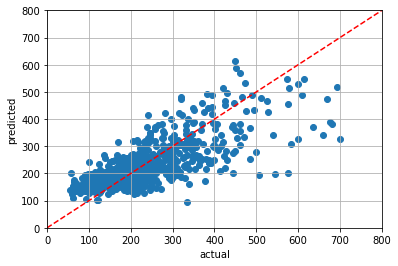

In [ ]:
plt.scatter(price, y_hat)
plt.plot([0,800],[0,800], linestyle='dashed', color = 'red')
plt.xlabel("actual")
plt.xlim(0,800)
plt.ylabel("predicted")
plt.ylim(0,800)
plt.grid(True)

In [ ]:
# Implementing a vectorized linear regression
from time import time
x = np.linspace(1, 10, 10)
b0 = 5
b1 = 2

vect1 = np.ones_like(x).reshape(-1,1)
x = np.reshape(x, (-1,1))
A = np.hstack([x, vect1])
betas = np.array([[b1],[b0]])

beginning = time()
y = np.matmul(A, betas)
ending = time()

print("Execution time in seconds is: {}".format(ending-beginning))

Execution time in seconds is: 8.392333984375e-05


## Exercises Ch.02

#### Exercise 2.2

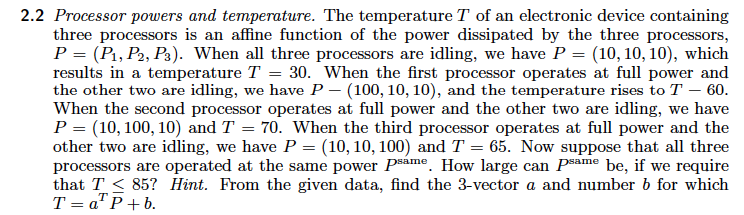

In [ ]:
# Note: To solve a system of linear equations A*x = b, we can find x = A_inverse * (b)^T

# Coefficients matrix
A = [[10, 10, 10, 1],
     [100, 10, 10, 1],
     [10, 100, 10, 1], 
     [10, 10, 100, 1]]

# Vector b
b = np.array([30, 60, 70, 65])

# Inverse of A
A_inv = np.linalg.inv(A)

# A_inv * (b)^T = x
x = A_inv.dot(b)

# Solution for a1, a2, and a3
print("a1 =", x[0], ", a2 =", x[1], ", a3 = ", x[2], ", b = ", x[3])

a1 = 0.3333333333333334 , a2 = 0.44444444444444453 , a3 =  0.3888888888888888 , b =  18.333333333333332


In [ ]:
a, b, c = 10, 10, 10
delta = 0.00001
T = 0

while (T <= 85):
  T = np.dot(x[:3],[a, b, c]) + x[3:]
  a, b, c = a+delta, b+delta, c+delta
  #print(a,b,c)
  
print("T = ", T, "P_Same = ", a, b, c)

T =  [85.00000334] P_Same =  57.14287000714782 57.14287000714782 57.14287000714782
